In [1]:

from google.colab import files  # import files module from google collab to handle file uploads

# upload necessary CSV files
uploaded = files.upload()

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics
from tabulate import tabulate

In [ ]:

data = pd.read_csv('CA-40 Congressional General Elections.csv') # import csv for congressional elections
data

,Year,Election_Type,Candidate,Party,Percent,Votes,Disqualified/Withdrawn
0,2022,General,Young Kim,Republican,56.8,"161,589",No
1,2022,General,Asif Mahmood,Democrat,43.2,"122,722",No
2,2022,Nonpartisan,Asif Mahmood,Democrat,40.9,"74,607",No
3,2022,Nonpartisan,Young Kim,Republican,34.7,"63,346",No
4,2022,Nonpartisan,Greg Raths,Republican,23.2,"42,404",No
5,2022,Nonpartisan,Nicholas Taurus,Republican,1.2,"2,193",No
6,2022,Nonpartisan,Hilaire Shioura,No Party Preference,NaN,NaN,Yes
7,2020,General,Lucille Roybal-Allard,Democrat,72.7,"135,572",No
8,2020,General,C. Antonio Delgado,Republican,27.3,"50,809",No
9,2020,Nonpartisan,Lucille Roybal-Allard,Democrat,50.7,"38,837",No


In [ ]:
# Creation of general_data by excluding data from non-general election, candidates who were disqualified or withdrew, and candidates whose voting data was not there
# Change the votes from string to int
general_data = data[data['Election_Type'] == 'General']
general_data = general_data[general_data['Disqualified/Withdrawn'] != 'Yes']
general_data = general_data.dropna(subset=['Votes'])
general_data['Votes'] = general_data['Votes'].str.replace(',','').astype(float).astype(int)

general_data

,Year,Election_Type,Candidate,Party,Percent,Votes,Disqualified/Withdrawn
0,2022,General,Young Kim,Republican,56.8,161589,No
1,2022,General,Asif Mahmood,Democrat,43.2,122722,No
7,2020,General,Lucille Roybal-Allard,Democrat,72.7,135572,No
8,2020,General,C. Antonio Delgado,Republican,27.3,50809,No
17,2018,General,Lucille Roybal-Allard,Democrat,77.3,93938,No
18,2018,General,Rodolfo Cotes Barragan,Green,22.7,27511,No
21,2016,General,Lucille Roybal-Allard,Democrat,71.4,106554,No
22,2016,General,Roman Gabriel Gonzalez,Independent,28.6,42743,No
25,2014,General,Lucille Roybal-Allard,Democrat,61.2,30208,No
26,2014,General,David Sanchez,Democrat,38.8,19171,No


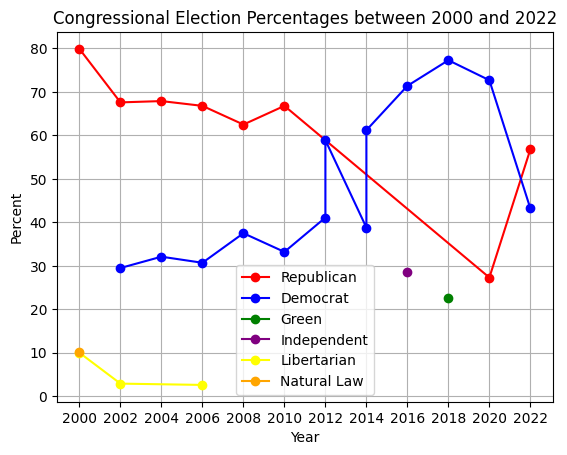

In [ ]:
#graph republican and democratic percent, convert to data Frame
congressional_percent_data = {
    'Year': general_data['Year'],
    'Party': general_data['Party'],
    'Percent': general_data['Percent']
}
congressional_percent_dF = pd.DataFrame(congressional_percent_data)

election_percent_data={} #hashtable key:party; value:year_percent_tuple

# obtain percent and year for each row and add it to the hashtable as a tuple
for row in congressional_percent_dF.itertuples():
    party = row.Party
    year_percent_tuple = (row.Percent, row.Year)
    if party in election_percent_data:
        election_percent_data[party].append(year_percent_tuple)
    else:
        election_percent_data[party]=[year_percent_tuple]

# party colors may correlate with the actual colors used by the party if the party is big enough
party_colors = {
    'Republican': 'red',
    'Democrat': 'blue',
    'Green': 'green',
    'Libertarian': 'yellow',
    'Independent': 'purple',
    'Natural Law': 'orange'
}
for party, results in election_percent_data.items():
    percentages = [x[0] for x in results] # extract y values
    years = [x[1] for x in results] # extract x values
    plt.plot(years, percentages, marker='o', color=party_colors[party],label=party) # graph each point

years_x_axis=[x[1] for results in election_percent_data.values() for x in results] # used to obtain min and max values of x
plt.xticks(range(min(years_x_axis), max(years_x_axis) + 1, 2))
# Graph the Congressional Election Percentages between 2000 and 2022
plt.xlabel('Year')
plt.ylabel('Percent')
plt.title('Congressional Election Percentages between 2000 and 2022')

plt.legend()
plt.grid(True)
plt.show()



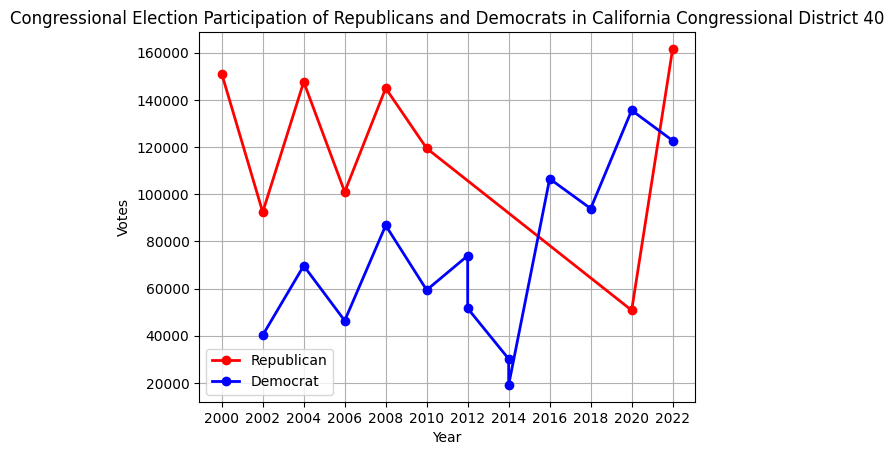

In [ ]:
# dataframe for calculating voter participation
congressional_votes = {
    'Year': general_data['Year'],
    'Party': general_data['Party'],
    'Votes': general_data['Votes']
}
congressional_votes_dF = pd.DataFrame(congressional_votes)

# arrays to hold amount of votes
republican_participation=[]
democrat_participation=[]
other_party_participation=[]

# obtain percent and year for each row and add it to the hashtable as a tuple
for row in congressional_votes_dF.itertuples():
    party = row.Party
    year_vote_tuple = (row.Votes, row.Year)
    if party  == 'Republican':
        republican_participation.append(year_vote_tuple)
    elif party == 'Democrat':
        democrat_participation.append(year_vote_tuple)
    else:
        other_party_participation.append(year_vote_tuple)

# sort republican and democrat participation arrays, and extract years and votes for graphing
republican_participation = sorted(republican_participation, key=lambda x: x[1])
democrat_participation = sorted(democrat_participation, key=lambda x: x[1])

republican_years = [x[1] for x in republican_participation]
republican_votes = [x[0] for x in republican_participation]

democrat_years = [x[1] for x in democrat_participation]
democrat_votes = [x[0] for x in democrat_participation]

# Reuse years_x_axis since the range of years is still the same
plt.xticks(range(min(years_x_axis),max(years_x_axis)+1,2))

# Graph participation of Republican and Democrat votes
plt.plot(republican_years, republican_votes, marker='o', color='red', label='Republican', linestyle='-', linewidth=2)
plt.plot(democrat_years, democrat_votes, marker='o', color='blue', label='Democrat', linestyle='-', linewidth=2)

plt.xlabel('Year')
plt.ylabel('Votes')
plt.title('Congressional Election Participation of Republicans and Democrats in California Congressional District 40')

plt.legend()
plt.grid(True)
plt.show()


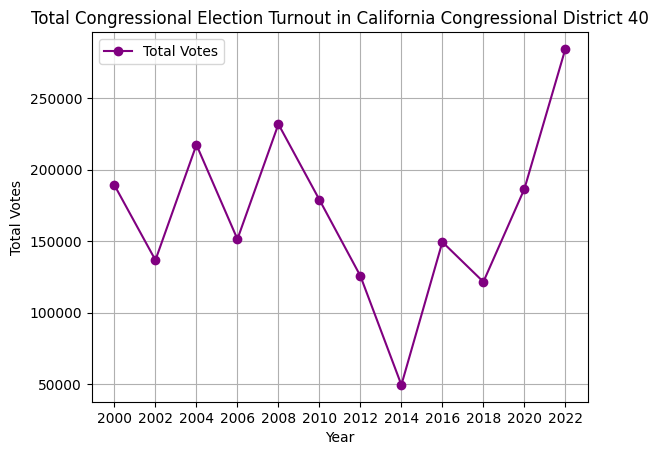

In [ ]:
composite_participation = republican_participation + democrat_participation + other_party_participation # create array of total participation
aggregate_composite_participation = {} # key:year value: votes
# Add votes to the hashtable
for votes, year in composite_participation:
    if year in aggregate_composite_participation:
        aggregate_composite_participation[year] += votes
    else:
        aggregate_composite_participation[year] = votes

# Necessary to sort the hashtable in ascending order of keys, or years
aggregate_composite_participation=dict(sorted(aggregate_composite_participation.items()))

# Reuse years_x_axis since the range of years is still the same
plt.xticks(range(min(years_x_axis), max(years_x_axis) + 1, 2))

# Graph participation of all votes
plt.plot(aggregate_composite_participation.keys(),aggregate_composite_participation.values(),marker='o', color='purple', label='Total Votes')
plt.xlabel('Year')
plt.ylabel('Total Votes')
plt.title('Total Congressional Election Participation in California Congressional District 40')

plt.legend()
plt.grid(True)
plt.show()

In [ ]:
data = pd.read_csv('CA-40 Senatorial General Elections.csv') # obtain data from CA-40 Senatorial General Elections

# standardize values and convert the values in the Percent and Votes columns to appropriate numeric data types
data['Party'] = data['Party'].replace('Miscellaneous', 'Other')
data['Party'] = data['Party'].replace('Democratic', 'Democrat')
data['Percent'] = data['Percent'].str.rstrip('%').astype(float)
data['Votes'] = data['Votes'].str.replace(',','').astype(float).astype(int)

senatorial_percent_dF = pd.DataFrame(data)
senatorial_percent_dF


,Year,Party,Percent,Votes
0,2022,Democrat,46.89,10261998
1,2022,Republican,23.88,5225578
2,2022,American Independent,3.50,766824
3,2022,Green,0.43,95109
4,2022,Libertarian,1.05,229188
...,...,...,...,...
100,2000,Libertarian,0.60,91472
101,2000,Natural Law,0.39,59059
102,2000,Reform,0.53,80753
103,2000,Other,0.89,134962


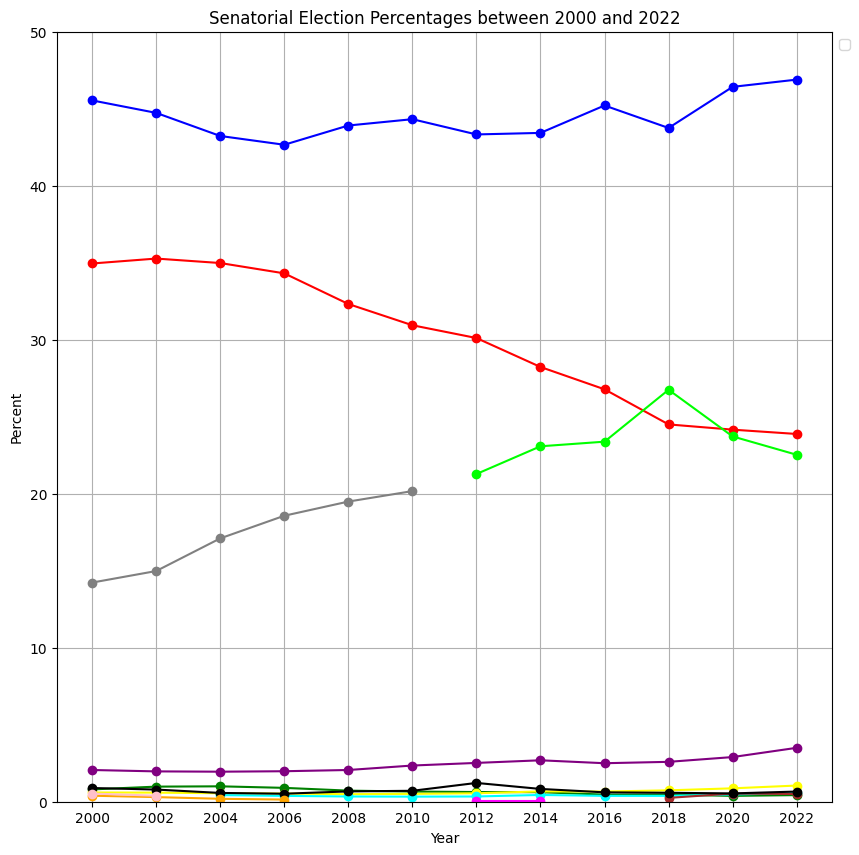

In [ ]:
election_percent_data={} #hashtable key:party; value:year_percent_tuple

# obtain percent and year for each row and add it to the hashtable as a tuple
for row in senatorial_percent_dF.itertuples():
    party = row.Party
    year_percent_tuple = (row.Percent, row.Year)
    if party in election_percent_data:
        election_percent_data[party].append(year_percent_tuple)
    else:
        election_percent_data[party]=[year_percent_tuple]

party_colors = {
    'Republican': 'red',
    'Democrat': 'blue',
    'Green': 'green',
    'Libertarian': 'yellow',
    'American Independent': 'purple',
    'Natural Law': 'orange',
    'Peace and Freedom': 'cyan',
    'Reform': 'pink',
    'Americans Elect': 'magenta',
    'Unknown': 'brown',
    'Other': 'black',
    'Decline to State': 'gray',
    'No Party Preference': 'lime'
}

plt.figure(figsize=(10, 10))
plt.xlabel('Year')
plt.ylabel('Percent')
plt.title('Senatorial Election Percentages between 2000 and 2022')
plt.ylim(0, 50)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Reuse years_x_axis since the range of years is still the same
plt.xticks(range(min(years_x_axis), max(years_x_axis) + 1, 2))

for party, results in election_percent_data.items():
    percentages = [x[0] for x in results]
    years = [x[1] for x in results]
    plt.plot(years, percentages, marker='o', color=party_colors[party],label=party)
plt.grid(True)
plt.show()

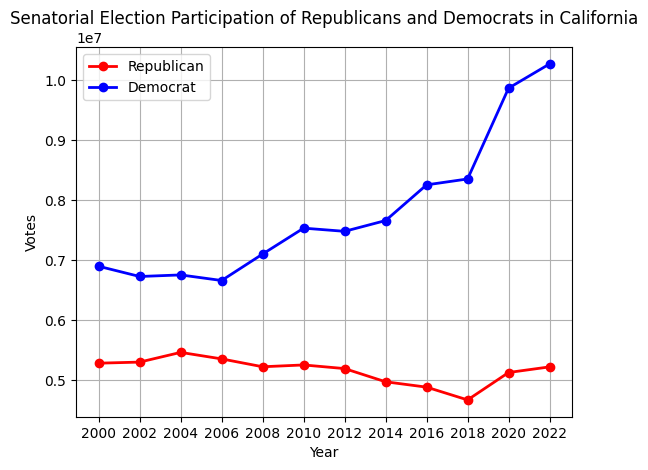

In [ ]:
# dataframe for calculating voter participation
senatorial_votes = {
    'Year': senatorial_percent_dF['Year'],
    'Party': senatorial_percent_dF['Party'],
    'Votes': senatorial_percent_dF['Votes']
}
senatorial_votes_dF = pd.DataFrame(senatorial_votes)

# arrays to hold amount of votes
republican_participation=[]
democrat_participation=[]
other_party_participation=[]

# obtain percent and year for each row and add it to the hashtable as a tuple
for row in senatorial_votes_dF.itertuples():
    party = row.Party
    year_vote_tuple = (row.Votes, row.Year)
    if party  == 'Republican':
        republican_participation.append(year_vote_tuple)
    elif party == 'Democrat':
        democrat_participation.append(year_vote_tuple)
    else:
        other_party_participation.append(year_vote_tuple)

# sort republican and democrat participation arrays, and extract years and votes for graphing
republican_participation = sorted(republican_participation, key=lambda x: x[1])
democrat_participation = sorted(democrat_participation, key=lambda x: x[1])

republican_years = [x[1] for x in republican_participation]
republican_votes = [x[0] for x in republican_participation]

democrat_years = [x[1] for x in democrat_participation]
democrat_votes = [x[0] for x in democrat_participation]

# Reuse years_x_axis since the range of years is still the same
plt.xticks(range(min(years_x_axis),max(years_x_axis)+1,2))

# Graph participation of Republican and Democrat votes
plt.plot(republican_years, republican_votes, marker='o', color='red', label='Republican', linestyle='-', linewidth=2)
plt.plot(democrat_years, democrat_votes, marker='o', color='blue', label='Democrat', linestyle='-', linewidth=2)

plt.xlabel('Year')
plt.ylabel('Votes')
plt.title('Senatorial Election Participation of Republicans and Democrats in California')

plt.legend()
plt.grid(True)
plt.show()


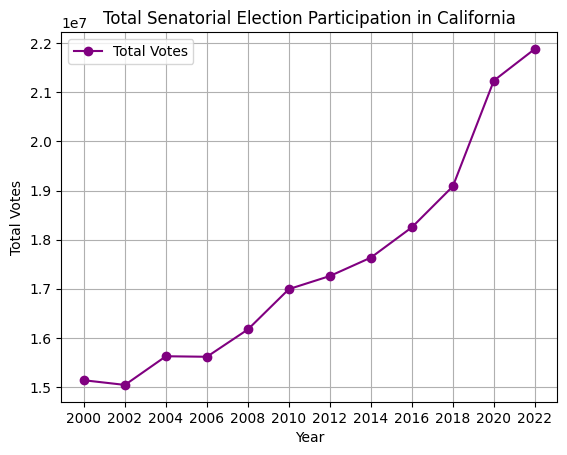

In [ ]:
composite_participation = republican_participation + democrat_participation + other_party_participation # create array of total participation

aggregate_composite_participation = {} # key:year value: votes

# Add votes to the hashtable
for votes, year in composite_participation:
    if year in aggregate_composite_participation:
        aggregate_composite_participation[year] += votes
    else:
        aggregate_composite_participation[year] = votes

# Necessary to sort the hashtable in ascending order of keys, or years
aggregate_composite_participation=dict(sorted(aggregate_composite_participation.items()))
# Reuse years_x_axis since the range of years is still the same
plt.xticks(range(min(years_x_axis), max(years_x_axis) + 1, 2))

# Graph participation of all votes
plt.plot(aggregate_composite_participation.keys(),aggregate_composite_participation.values(),marker='o', color='purple', label='Total Votes')
plt.xlabel('Year')
plt.ylabel('Total Votes')
plt.title('Total Senatorial Election Participation in California')

plt.legend()
plt.grid(True)
plt.show()

In [ ]:
racial_voter_turnout = pd.read_csv('Eligible Voter Turnout Racial Breakdown.csv')
racial_voter_turnout

,Year,Latino,Asian American,Total
0,2010,28.7,24.4,43.7
1,2012,39.1,32.6,53.4
2,2014,17.3,18.4,30.9
3,2016,46.4,38.5,57.3
4,2018,34.8,32.6,48.6
5,2020,53.8,58.8,66.8
6,2022,26.4,35.3,43.0


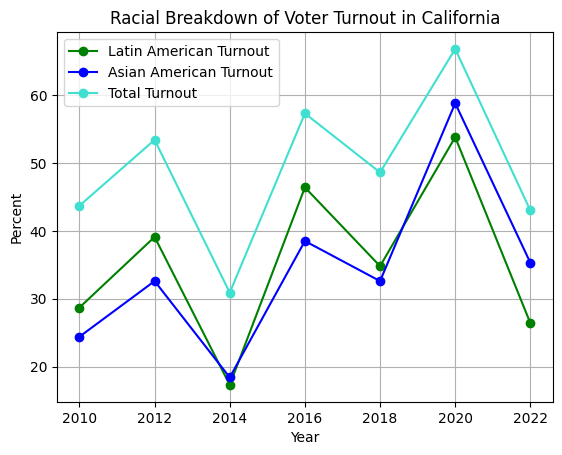

In [ ]:
la_turnout = racial_voter_turnout['Latino']
aa_turnout = racial_voter_turnout['Asian American']
total_turnout = racial_voter_turnout['Total']
year = racial_voter_turnout['Year']

plt.plot(year,la_turnout,marker='o',color='green',label='Latin American Turnout')
plt.plot(year,aa_turnout,marker='o',color='blue',label='Asian American Turnout')
plt.plot(year,total_turnout,marker='o',color='turquoise',label='Total Turnout')
plt.xlabel('Year')
plt.ylabel('Percent')
plt.title('Racial Breakdown of Voter Turnout in California')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Helper methods for statistics
def percent_change(turnout):
    percent_change_turnout=[]
    for i in range(1,len(turnout)):
        percent_change_turnout.append(((turnout[i]-turnout[i-1])/turnout[i-1])*100)
    return percent_change_turnout

def tabulate_statistics(statistic_name,statistic):
    average_data = {
        "Category": ["Latino", "Asian American", "Total"],
        statistic_name: statistic
    }
    table_data = list(zip(average_data["Category"], average_data[statistic_name]))
    print(statistic_name)
    print(tabulate(table_data, headers=["Category", statistic_name], tablefmt="grid"))



In [ ]:
avg_la_turnout = sum(la_turnout) / len(la_turnout)
avg_aa_turnout = sum(aa_turnout) / len(aa_turnout)
avg_total_turnout = sum(total_turnout) / len(total_turnout)
tabulate_statistics("Average Turnout",[avg_la_turnout, avg_aa_turnout, avg_total_turnout])

stdev_la_turnout = statistics.stdev(la_turnout)
stdev_aa_turnout = statistics.stdev(aa_turnout)
stdev_total_turnout = statistics.stdev(total_turnout)
tabulate_statistics("Standard Deviation of Turnout",[stdev_la_turnout, stdev_aa_turnout, stdev_total_turnout])

percent_change_la_turnout = percent_change(la_turnout)
percent_change_aa_turnout = percent_change(aa_turnout)
percent_change_total_turnout = percent_change(total_turnout)
year_transitions = ["2010-2012","2012-2014","2014-2016", "2016-2018","2018-2020","2020-2022"]
percent_change_turnout = {
    "Year Transitions" : year_transitions,
    "Latin American Turnout Percent Change" : percent_change_la_turnout,
    "Asian American Turnout Percent Change" : percent_change_aa_turnout,
    "Total Turnout Percent Change" : percent_change_total_turnout
}
percent_change_turnout_dF = pd.DataFrame(percent_change_turnout)
print(tabulate(percent_change_turnout_dF, headers='keys', tablefmt='grid'))

variance_la_turnout = statistics.variance(la_turnout)
variance_aa_turnout = statistics.variance(aa_turnout)
variance_total_turnout = statistics.variance(total_turnout)
tabulate_statistics("Turnout Variance",[variance_la_turnout, variance_aa_turnout, variance_total_turnout])


Average Turnout
+----------------+-------------------+
| Category       |   Average Turnout |
+================+===================+
| Latino         |           35.2143 |
+----------------+-------------------+
| Asian American |           34.3714 |
+----------------+-------------------+
| Total          |           49.1    |
+----------------+-------------------+
Standard Deviation of Turnout
+----------------+---------------------------------+
| Category       |   Standard Deviation of Turnout |
+================+=================================+
| Latino         |                         12.4289 |
+----------------+---------------------------------+
| Asian American |                         12.7505 |
+----------------+---------------------------------+
| Total          |                         11.5245 |
+----------------+---------------------------------+
+----+--------------------+-----------------------------------------+-----------------------------------------+---------------